# Google Colab - Installs

In [1]:
pip install inflection

# 0.0 Imports

In [2]:
import pandas as pd
import inflection #!sudo pip install inflection (ajudar renomear biblioteca)
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10) # Plot Size


### 0.1 Helper Functions

### 0.2 Loading data

In [3]:
df_sales_raw = pd.read_csv('https://raw.githubusercontent.com/miguelzeph/curso_ds_em_producao/master/data/train.csv',low_memory=False)
df_store_raw = pd.read_csv('https://raw.githubusercontent.com/miguelzeph/curso_ds_em_producao/master/data/store.csv',low_memory=False)

# Jupyter Local
#df_sales_raw = pd.read_csv('./data/train.csv',low_memory=False)
#df_store_raw = pd.read_csv('./data/store.csv',low_memory=False)


# Merge ( Merge != Join != Concat)
df_raw = pd.merge(df_sales_raw,df_store_raw, how = 'left', on='Store')

In [4]:
df_raw.sample()# Pega uma rows aleatória pra visualizar

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
659528,234,7,2013-11-17,0,0,0,0,0,0,d,a,4370.0,NaN,NaN,0,NaN,NaN,NaN


# 1.0 **PASSO 01** - Descrição dos Dados

#### Copy dos dados

In [5]:
# Sempre faça isso, pois em grandes projetos, você pode sobescrever os dados anteriores
df1 = df_raw.copy()

### 1.1 Rename Columns (sempre faça isso para facilitar)

In [6]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
cols_old[0]

'Store'

In [8]:
# Função Lambda para aplicar
snakecase = lambda x: inflection.underscore( x )

# Map aplicar uma função em cada elemento de uma lista
cols_new = list(map(snakecase,cols_old))

# rename
df1.columns = cols_new

In [9]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

### 1.2 Data Dimensions

In [10]:
print(f'number of rows: {df1.shape[0]}')
print(f'number of rows: {df1.shape[1]}')

number of rows: 1017209
number of rows: 18


### 1.3 Data type

In [11]:
df1.dtypes

# NO PANDAS 'object' ele entende que é uma 'string'
# Contudo, a "date" tem que estar sempre no formato de data!

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [12]:
# Mudar pra date type
df1['date'] = pd.to_datetime( df1['date'] )
# verifique agora
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4 Check NA

In [13]:
df1.isna().sum()
# Veja que temos colunas com muitos NA...

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [14]:
#1-) podemos descartar as linhas -> df1.dropna()

#2-) usar algorítmos de ML que você prevê os valores vazios.
# (QUANDO VOCÊ NÃO TEM INFORMAÇÕES DOS DADOS... ou alguém para te tirar as dǘvidas)

#3-) Entender o problema, você CONVERSANDO com o stakeholder ou usando sua LÓGICA

### 1.5 Fillout NA ( Preencher os NA)

Optamos por usar o 3-) pois é uma boa prática para exercitar... ( o método 2-) você pode por exemplo criar um modelo ML (Decision Tree por exemplo) para prever os valores

In [15]:
# Método 3-)... vamos substituir por lógica

#-------competition_distance              2642--------
# Vamos supor que os valores NA nesta coluna é porque não existem competidores nas proximidades,
df1['competition_distance'].max() # 75.860
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)
df1['competition_distance'].max()# 200000.0

#----------competition_open_since_month    323348-------
# Motivo da loja estar vazia:
# 1-) A loja não tem competidor próximo
# 2-) Tenho um competidor próximo, mas não sabemos quando abriu
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'],axis=1)

#----------competition_open_since_year     323348-----
# Mesma lógica, só que agora por year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'],axis=1)

#---------promo2_since_week               508031-------
# Mesma Lógica...
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

#promo2_since_year               508031
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

#-------promo_interval                  508031------
df1['promo_interval'].fillna(0,inplace=True) # substituir os NaN por zero primeiro

# criar um dict month_map (para fazer comparação com os promo_interval)
month_map = {1:'Jan',2:'Fev',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

# criar df
df1['month_map'] = df1['date'].dt.month.map(month_map)

#-----promo_interval                  508031-------
df1['promo_interval'].fillna(0,inplace=True) # substituir os NaN por zero primeiro

# criar um dict month_map (para fazer comparação com os promo_interval)
month_map = {1:'Jan',2:'Fev',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

# criar df
df1['month_map'] = df1['date'].dt.month.map(month_map)

# Se Data (month_map) estiver dentro da promoção (promo_interval), retorna 1... se não 0
def f_promo_interval(x):

  promo_interval = x[0]
  month_map = x[1]

  if promo_interval == 0:
    return 0

  if month_map in promo_interval:
    return 1
  return 0
# criar uma nova coluna e aplicar a func
df1['is_promo'] = df1[['promo_interval','month_map']].apply(f_promo_interval,axis=1)



In [16]:
df1.sample(5).T # Visualizar T

,124861,136016,270331,241219,144351
store,1097,1102,352,206,517
day_of_week,6,3,2,5,2
date,2015-04-11 00:00:00,2015-04-01 00:00:00,2014-11-25 00:00:00,2014-12-26 00:00:00,2015-03-24 00:00:00
sales,7523,7972,7479,0,4869
customers,2003,768,615,0,606
open,1,1,1,0,1
promo,0,1,1,0,0
state_holiday,0,0,0,c,0
school_holiday,0,1,0,1,0
store_type,b,a,d,a,a


### 1.6 Check again Types

Sempre bom revisar, pois as mudanças que fizemos podem mudar os tipos

In [17]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

### 1.6 Check again Types

Sempre bom revisar, pois as mudanças que fizemos podem mudar os tipos

In [18]:
# Passar para inteiro

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)


In [19]:
# Verificar
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

### 1.7 Descriptive Statistical

In [20]:
#Atributos Numéricos
num_attributes = df1.select_dtypes(include = ['int64','float64'])

#Atributos Categóricos
cat_attributes = df1.select_dtypes(exclude = ['int64','float64','datetime64[ns]'])

In [21]:
# Só para verificar se são strings msm
cat_attributes['state_holiday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

### 1.7.1 Numerical Attriutes

##### 1.7.1.1 Metric of Central Tendency

In [22]:
# Central Tendency - Mean and Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean )).T
ct2 = pd.DataFrame( num_attributes.apply( np.median )).T

##### 1.7.1.2 Metric of Dispersion

In [23]:
# Dispersion - std(desvio padrao), min, max, range(max-min), skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate        Ordem que quero ver
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median','std','skew','kurtosis'] 

In [24]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


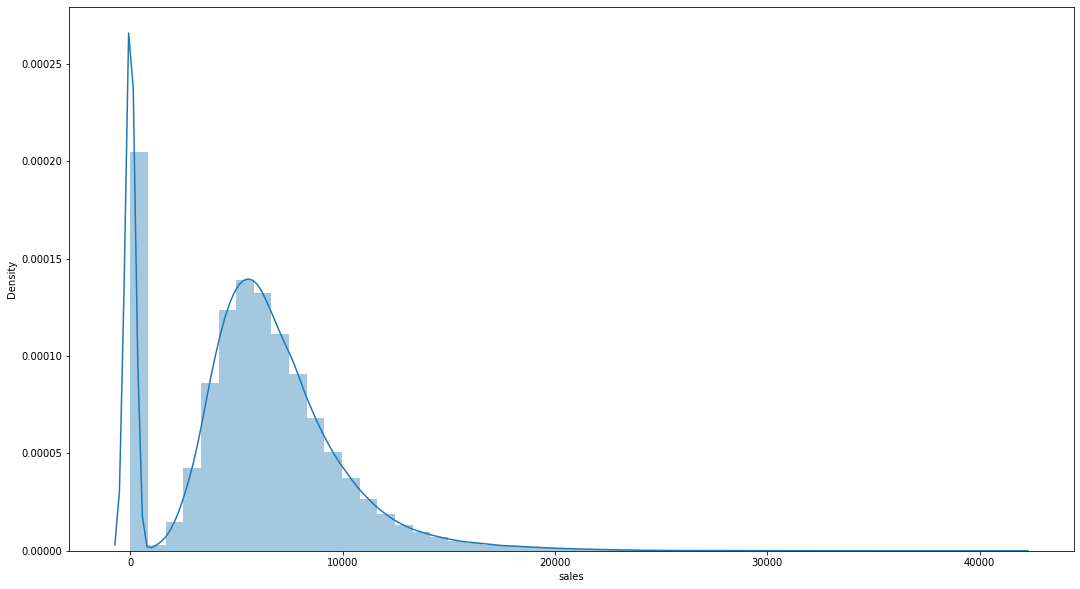

In [25]:
# Análises

# SALES
# - veja que a média e mediana são muito pŕoximas, logo não há um deslocamento da distribuição normal muito grande.
# - A skew é uma representação do quão deslocado está sua distribuição normal, quanto mais próximo de ZERO, mais centralizada está.
# - A Kutrosi próximo de 1, é o ideal para uma distribuição normal, contudo, valores altos de kurtosi, refletem no tamanho do pico

sns.distplot(df1['sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


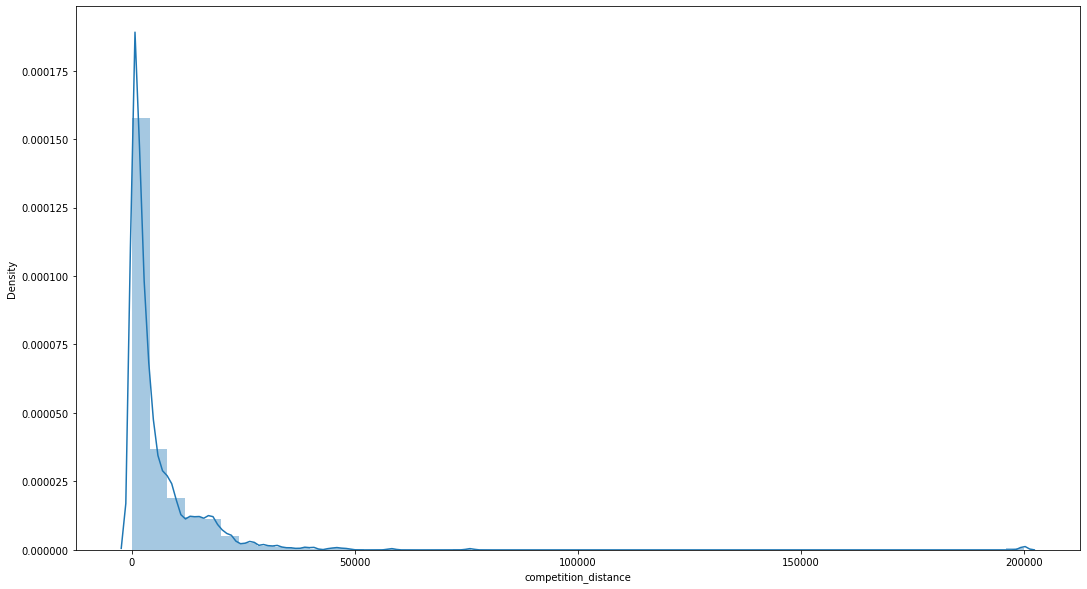

In [26]:
# COMPETITION_DISTANCE
# - veja que a Skew está em 10... que significa que provavelmente tem um grande deslocamento nesta distribuição normal.
# - A uma Kurtosis gigantescac de 147... Logo deve ter dado um pico gigantesco

# Só de olhar a Skew e Kurtosis, parece que temos uma distribuição de Poisson... logo existe uma concentração muito alta
# de valores no começo.

sns.distplot(df1['competition_distance'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


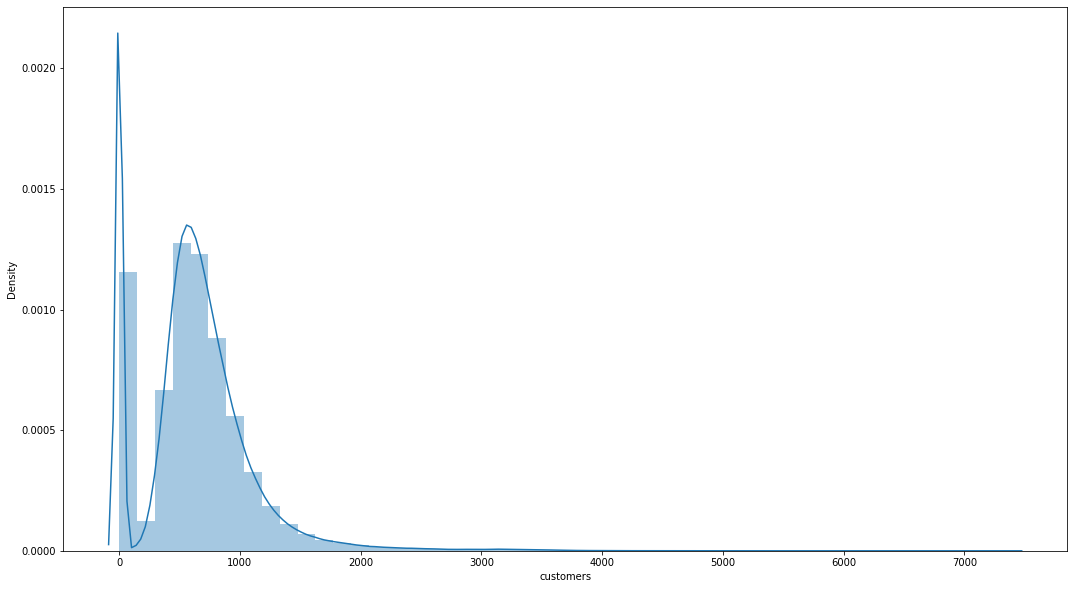

In [27]:
# COSTUMERS
# - Média de 633 pessoas na loja por dia, com desvio parão de 464... Logo, em um dia eu POSSO ter de 200 a 1000 pessoas em um dia
sns.distplot(df1['customers'])

##### 1.7.1.2 Categorical Attributes

In [28]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

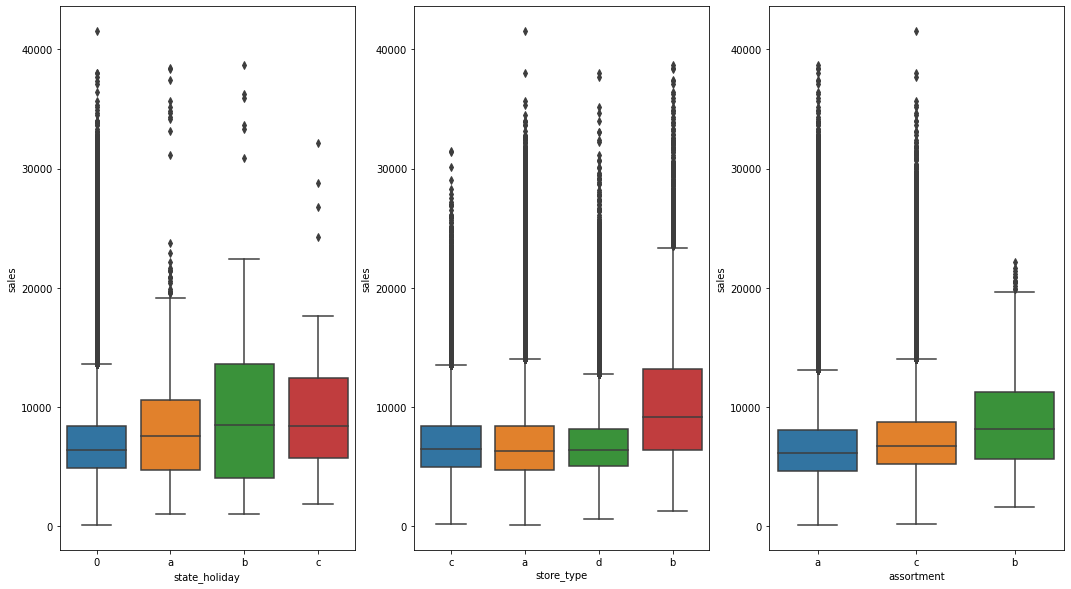

In [29]:
plt.rcParams["figure.figsize"] = (18,10)

aux1 = df1[ (df1['state_holiday'] != 0) & (df1['sales'] > 0) ]

plt.subplot(1,3,1)
sns.boxplot(
    x='state_holiday',
    y='sales',
    data=aux1
)
plt.subplot(1,3,2)
sns.boxplot(
    x='store_type',
    y='sales',
    data=aux1
)
plt.subplot(1,3,3)
sns.boxplot(
    x='assortment',
    y='sales',
    data=aux1
)

# 2.0 **Passo 02** - Feature Engineering

## 2.1 Mind Map Hypostesis

Usaremos o Coggle, para criar os mind map hypothesis.

1 - Nosso Fenômeno -> Vendas Diáreas  (Fica no centro)

2 - Nossos agentes -> Clientes, Localização, Produtos, Lojas, Temporal ( Ficam nos ramos)

3 - Características dos Agentes -> (vários...) ficam nos Ramos dos Agentes

<image src ="https://github.com/miguelzeph/curso_ds_em_producao/blob/master/img/MindMapHypothesis.png?raw=true" >

## 2.2 Criação das Hipóteses

### 2.2.1 Hipoteses **Loja**

1 - Lojas com n maior de funcionários deveriam vender mais ( não temos n de func )

2 - Lojas com maior capacidade de estoque deveriam vender mais ( não tenho dados do estoque )

3 - Lojas com maior porte deveriam vender mais ( Não tenho o porte da Loja )

4 - Lojas com sortimento maios, deveriam vender mais ( Ok, tenho os tipos de sortimento)

5 - Lojas com competidores mais próximos deveriam vender menos ( Ok,Tenho informações dos competidores )

6 - Lojas com competidores à mais tempo deveriam vender mais ( Ok ) 

### 2.2.2 Hipoteses **Produtos**

1 - Lojas que investem mais em Marketing deveriam vender mais.

2 - Lojas com maior exposição de produtos deveriam vender mais.

3 - Lojas com produtos com preço menor deveriam vender mais.

4 - Lojas com promoções mais agressivas deveriam vender mais.

5 - Lojas com promoções ativas por mais temo deveriam vender mais. (ok)

6 - Lojas com mais dias de promoção deveriam vender mais. (ok)

7 - Lojas com mais promoções consecutivas deveriam vender mais. (ok)

### 2.2.3 Hipoteses **Tempo**

1 - Lojas abertas no feriado de natal deveriam vender mais

2 - Lojas deveriam vender mais ao longo dos anos

3 - Lojas deveriam vender mais no segundo semetre do ano

4 - Lojas deveriam vender mais depois do dia 10 de cada mês

5 - Lojas deveriam vender menos aos finais de semana.

6 - Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Lista Final de Hipósteses

**LOJAS**

4 - Lojas com sortimento maios, deveriam vender mais ( Ok, tenho os tipos de sortimento)

5 - Lojas com competidores mais próximos deveriam vender menos ( Ok,Tenho informações dos competidores )

6 - Lojas com competidores à mais tempo deveriam vender mais ( Ok )

**PRODUTOS**

5 - Lojas com promoções ativas por mais temo deveriam vender mais. 

6 - Lojas com mais dias de promoção deveriam vender mais.

7 - Lojas com mais promoções consecutivas deveriam vender mais.

**TEMPO**

1 - Lojas abertas no feriado de natal deveriam vender mais

2 - Lojas deveriam vender mais ao longo dos anos

3 - Lojas deveriam vender mais no segundo semetre do ano

4 - Lojas deveriam vender mais depois do dia 10 de cada mês

5 - Lojas deveriam vender menos aos finais de semana.

6 - Lojas deveriam vender menos durante os feriados escolares.




Se o modelo não performar bem, **teremos que pegar pegar mais dados** para performar...